In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#get the training data
dfx = pd.read_csv('linearX.csv')

In [3]:
dfy = pd.read_csv('linearY.csv')

In [4]:
x = dfx.values
y = dfy.values

In [5]:
print(dfx.shape)
print(dfy.shape)

(99, 1)
(99, 1)


In [6]:
dfx.head()

,9.1
0,8.0
1,9.1
2,8.4
3,6.9
4,7.7


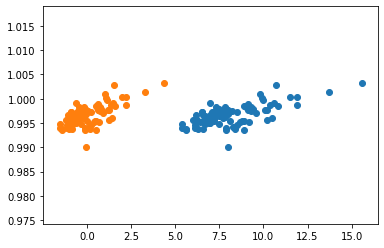

In [7]:
#visualize and preprocess the data , how the data looks like
plt.scatter(dfx,dfy)
X = (x - x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

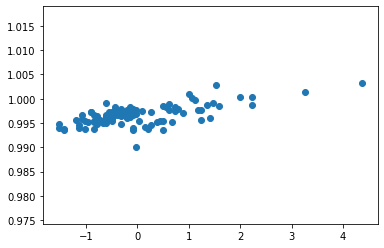

In [8]:
plt.scatter(X,Y)
plt.show()

# GRADIENT DESCENT ALGORITHM
1. start with a random theta
2. repeat until convergence
3. update theta according to the rule

In [9]:
#define hypothesis function
def hypothesis(x, theta): #theta is a vector of theta value, x is a scalar
    return theta[1]*x + theta[0]

In [10]:
#define the total error
def error(X,Y,theta): # X=dataset, Y=actual value, theta to compute the error
    
    m = X.shape[0] #number of samples
    err = 0
    for i in range(m):
        hx = hypothesis(X[i],theta) #hypothesis of X[i] with theta
        err += (hx - Y[i])**2
        
    return err

In [11]:

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx - Y[i])
        grad[1] += (hx - Y[i])*X[i]
        
    return grad

In [12]:
#define gradient descent
def gradientDescent(X,Y,learning_rate=0.001):
    theta = np.zeros((2,1))
    
    itr = 0
    max_itr = 100
    error_list = [] #compute the error and add error to the list
    
    while itr<=max_itr:
        grad = gradient(X,Y,theta)
        error_list.append(error(X,Y,theta))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        itr+=1
        
    return theta, error_list

In [13]:
final_theta,error_list = gradientDescent(X,Y)

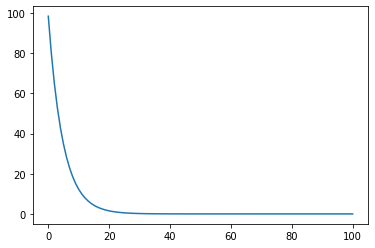

In [15]:
plt.plot(error_list) #as number of iteration is increasing , the error is decreasing

In [20]:
final_theta

array([[0.99660749],
       [0.00136481]])

In [20]:
#plot the line for test data
xtest = np.linspace(-2,6,10)#0 se 10 ke beech mai equal intervals pr 10 values return kr dega --> linspace

In [21]:
xtest

array([-2.        , -1.11111111, -0.22222222,  0.66666667,  1.55555556,
        2.44444444,  3.33333333,  4.22222222,  5.11111111,  6.        ])

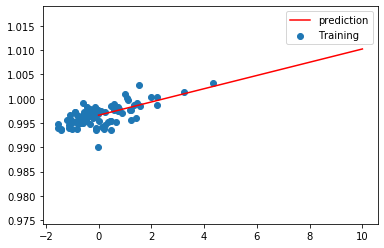

In [28]:
plt.scatter(X,dfy,label="Training") #plot the original points
plt.plot(xtest,hypothesis(xtest,final_theta),color='red',label="prediction") #plot the line
plt.legend()
plt.show()

# Linear Regression using Sklearn

In [33]:
train = pd.read_csv('Train.csv')

In [34]:
test = pd.read_csv('Test.csv')